In [18]:
import pandas as pd
import numpy as np
import datetime as dt

In [19]:
import matplotlib.pyplot as plt

In [20]:
edges = pd.read_csv('edges-new.csv')

In [21]:
edges.columns

Index(['stop_id', 'target_stop_id', 'trip_id', 'departure_time',
       'route_short_name', 'duration_to_next', 'stop_lat', 'stop_lon'],
      dtype='object')

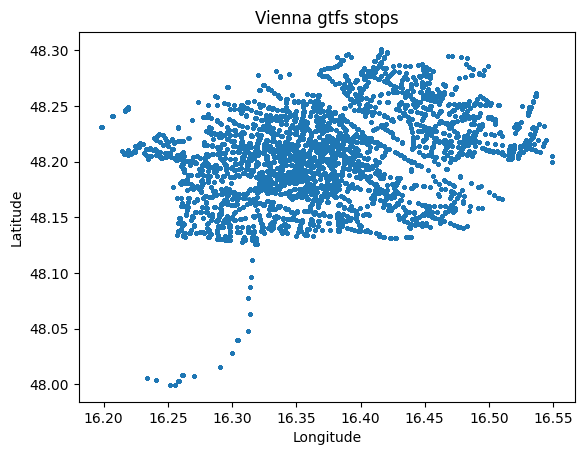

In [34]:
fig, ax = plt.subplots()
ax.scatter(x = edges.stop_lon, y= edges.stop_lat, s = 3)
plt.title('Vienna gtfs stops')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
# plt.xlim(16.30, 16.35)
# plt.ylim(48.20, 48.10)
plt.show()